In [1]:
import warnings
warnings.filterwarnings('ignore')
from pc_model import plot_query, score_query, score_model_similarity, compare_para_positions_across_models, Marr2Algorithms
from csv_analysis import make_regression_plots
import numpy as np
import seaborn as sb
import sys
from scipy.stats import wilcoxon, ttest_1samp, mannwhitneyu, pearsonr, entropy
from scipy.special import kl_div
sb.set()
from matplotlib import pyplot as pl
np.random.seed()
%matplotlib inline
sb.set()
current_palette = sb.color_palette()



In [ ]:
run pc_model

Building Independent Reg Model
Building Independent Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models


In [16]:
print ms[0][0]
[strike(d['Para Position at Term'], strike_params[0], strike_params[1], .05) for d in ms[0] if d['Result'] == 2]
[d['Para Position at Term'] for d in ms[0] if d['Result'] == 2]
#[static_strike(d['Para Position at Term'], strike_params[0], strike_params[1]) for d in ms[0] if d['Result'] == 2]
# strike(para_varbs, self.strike_means, self.strike_std, self.strike_ci):
#print strike_params[0]
#print strike_params[1]


{'Hunt Duration': 0.89600000000000002, 'Result': 1, 'Number of Bouts': 4, 'Para Position at Term': {'Para Dist Velocity': 0, 'Para Alt': 0.61677682812445844, 'Para Az': 0.21928173865499423, 'Para Dist': 168.65464829486078, 'Para Alt Velocity': 0, 'Para Az Velocity': 0}, 'Frames Out Of View': 0, 'Energy Expended': 66.875243416981633}


[{'Para Alt': 0.27350989784647001,
  'Para Alt Velocity': 0,
  'Para Az': -0.59731529212490519,
  'Para Az Velocity': 0,
  'Para Dist': 73.708653212715433,
  'Para Dist Velocity': 0},
 {'Para Alt': 0.14165803371390398,
  'Para Alt Velocity': 0,
  'Para Az': 0.0050380050046076371,
  'Para Az Velocity': 0,
  'Para Dist': 116.62911417710161,
  'Para Dist Velocity': 0},
 {'Para Alt': 0.35919191315893167,
  'Para Alt Velocity': 0,
  'Para Az': -0.14711330773024162,
  'Para Az Velocity': 0,
  'Para Dist': 123.25366666032619,
  'Para Dist Velocity': 0},
 {'Para Alt': 0.31983814297763458,
  'Para Alt Velocity': 0,
  'Para Az': -0.17329926811299876,
  'Para Az Velocity': 0,
  'Para Dist': 147.10539104234937,
  'Para Dist Velocity': 0},
 {'Para Alt': 0.70141677301449368,
  'Para Alt Velocity': 0,
  'Para Az': -0.15923844260497377,
  'Para Az Velocity': 0,
  'Para Dist': 100.14273539271819,
  'Para Dist Velocity': 0},
 {'Para Alt': 0.35665380899539439,
  'Para Alt Velocity': 0,
  'Para Az': -0.08

in bayes
One Sample T on Medians
Ttest_1sampResult(statistic=-17.349351572897479, pvalue=1.4660142440096302e-22)
[0.022781457386122587, 0.011772051206276392, 0.16230514008667341]


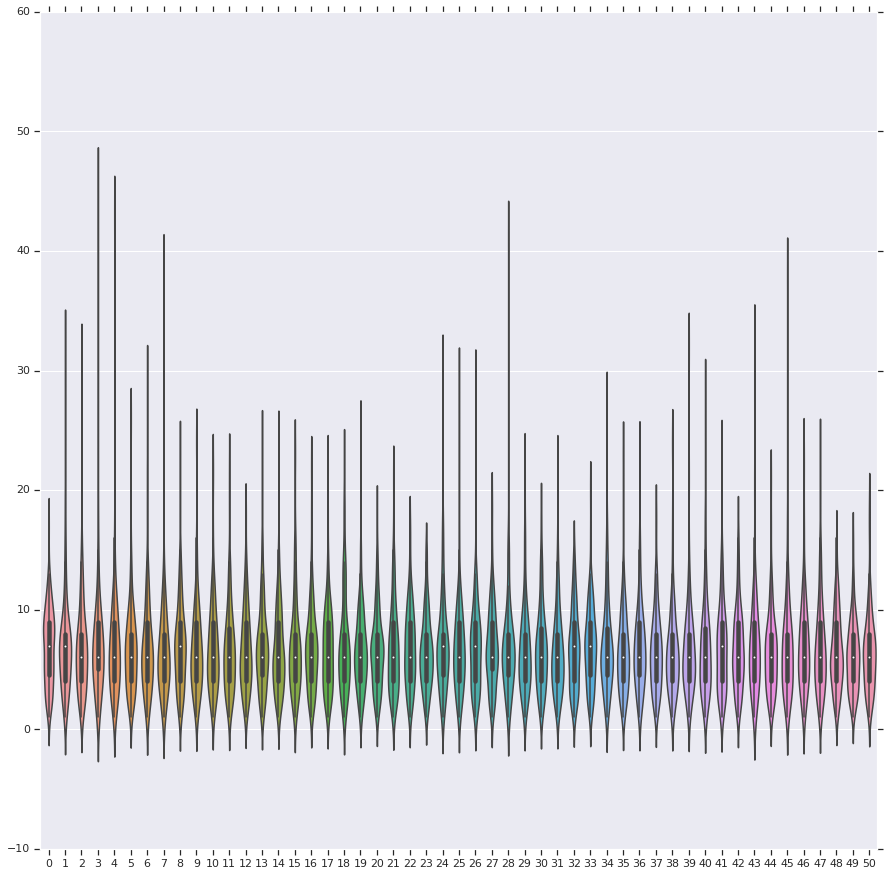

[]


In [2]:
p_inits = np.load('p_inits.npy').tolist()
strike_params = np.load('strike_params.npy')
marralgs = Marr2Algorithms(p_inits, strike_params, 0)
marralgs.marr_bdb_file.np_prng.seed()
marralgs.run_marr2_models(50)
marralgs.result_compiler()
print marralgs.fails

One Sample T on Medians
Ttest_1sampResult(statistic=-17.349351572897479, pvalue=1.4660142440096302e-22)
[0.35331485495277959, 0.011772051206276392, 0.16230514008667341]


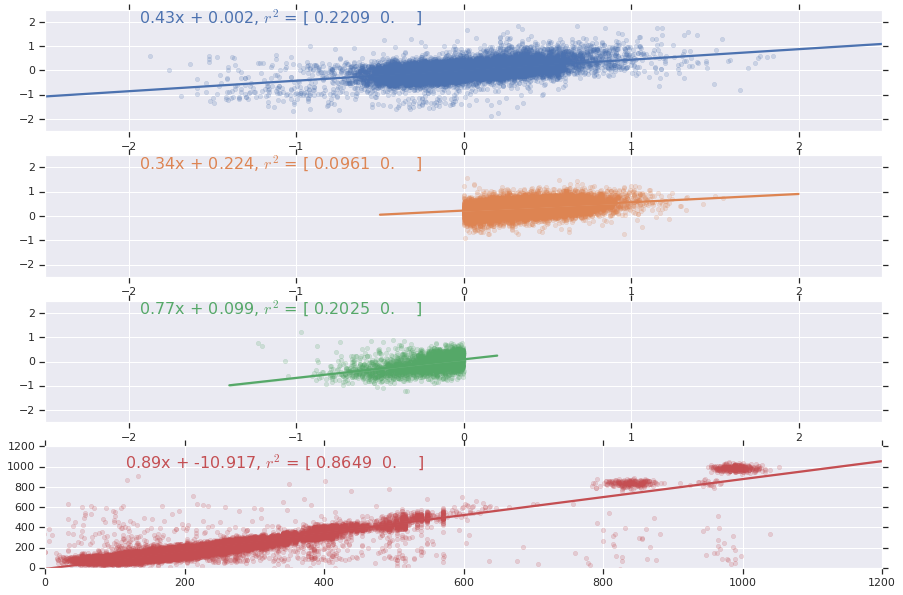

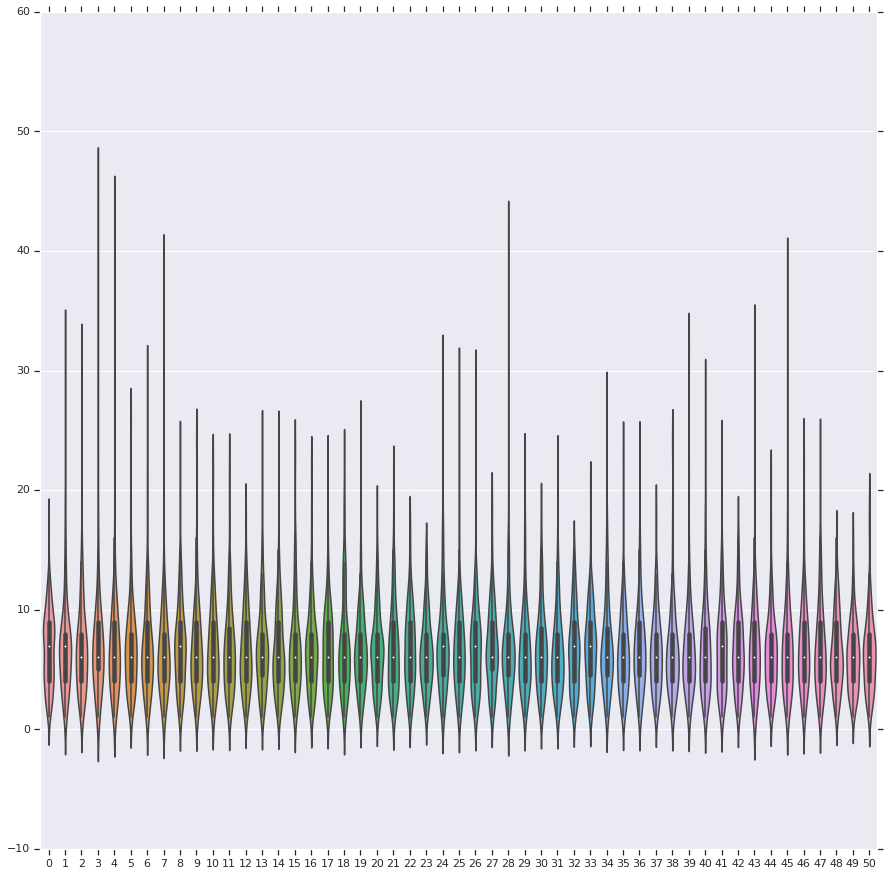

In [3]:
# this function assures that the probabilistic fits didn't just come up with a better static model.
# it uses the prebout and postbout para transformations completed by the bayes model to 
# rerun the static model. the params are plotted below. it can't explain the victory by the bayes model. 

# validate model transformations function simply takes what a bout driven model (or a bayes model) has done in 
# terms of prebout/postbout transformation and compares it to truth. it fires back the 
# slope and y-int of the transformation fit and you can use that to validate probabilistic victories. 
# the "1" flag below simply says to use the fits 

marralgs.validate_bayes_model(1)
#marralgs.averages

In [8]:
[(tr, av) for tr, av in zip(marralgs.test_results, marralgs.averages[1:])]
#marralgs.averages
np.mean([7,
   29,
   21,
   20,
   27,
   15,
   35,
   14,
   16,
   18,
   21,
   14,
   12,
   18,
   26,
   28,
   19,
   7,
   21,
   14,
   15,
   13,
   31,
   11,
   15,
   17,
   14,
   30,
   39,
   20,
   27,
   10,
   17,
   9,
   26,
   14,
   23,
   28,
   35,
   27,
   14,
   16,
   15,
   31,
   22,
   10,
   2,
   21,
   45,
   34])

20.260000000000002

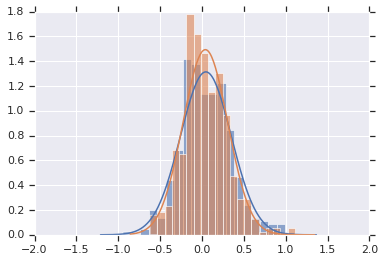

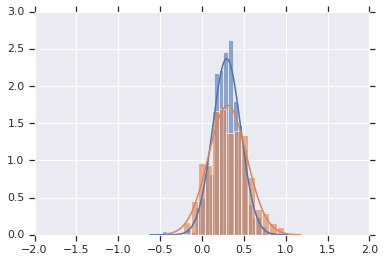

0.305454724405
0.229455566568
0.294924309536
0.168556154316


In [22]:
# def compare_para_positions_across_models(simlist_by_hunt, mod1, mod2,
                                         # pre_or_post, use_abs, varb, *para_coords):
    
# para_coords entry allows you to directly add coords from marralgs runs. 
    
# mod1 and mod2 are compared by index in modlist. current modlist is:

# modlist2 =    [{"Model Type": "Real Coords", "Real or Sim": "Real"},
#                {"Model Type": "Multiple Regression Position", "Real or Sim": "Real"},
#                {"Model Type": "Multiple Regression Velocity", "Real or Sim": "Real"}, 
#                {"Model Type": "Ideal", "Real or Sim": "Real", "Spherical Bouts": "All"},
#                {"Model Type": "Ideal", "Real or Sim": "Real", "Spherical Bouts": "All", "Extrapolate Para": 10},
#                {"Model Type": "Ideal", "Real or Sim": "Real", "Spherical Bouts": "Hunt"},
#                {"Model Type": "Ideal", "Real or Sim": "Real", "Spherical Bouts": "Hunt", "Extrapolate Para": 10},
#                {"Model Type": "Random", "Real or Sim": "Real", "Spherical Bouts": "All"},
#                {"Model Type": "Random", "Real or Sim": "Real", "Spherical Bouts": "Hunt"}


#pv2, pv1, ax = compare_para_positions_across_models(simlist_by_hunt, 2, 1, 1, False, 'Para Alt')
#pv2, pv1, ax = compare_para_positions_across_models(simlist_by_hunt, 2, 1, 1, False, 'Para Alt')
paz1, paz2, ax = compare_para_positions_across_models(simlist_by_hunt, 1, 2, 1, False, 'Para Az')
palt1, palt2, ax = compare_para_positions_across_models(simlist_by_hunt, 1, 2, 1, False, 'Para Alt')


In [8]:
def calc_kl_divergence(p1, p2, numbins, range):
    colors = sb.color_palette()
    hist1, bins = np.histogram(p1, bins=numbins, range=range)
    pdf1 = hist1 / np.sum(hist1).astype(np.float)
    pdf1 = [p if p != 0 else 1e-10 for p in pdf1]
    hist2, bins = np.histogram(p2, bins=numbins, range=range)
    pdf2 = hist2 / np.sum(hist2).astype(np.float)
    pdf2 = [p if p != 0 else 1e-10 for p in pdf2]
    width = bins[1] - bins[0]
    center = (bins[:-1] + bins[1:]) / 2
    pl.bar(center, hist1, align='center', width=width, color=colors[0])
    pl.bar(center, hist2, align='center', width=width, color=colors[1])
    pl.show()
    return pdf1, pdf2
    

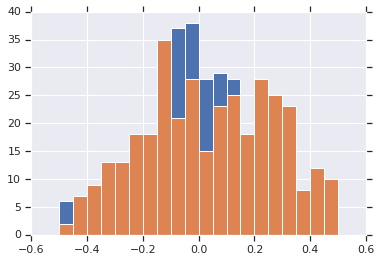

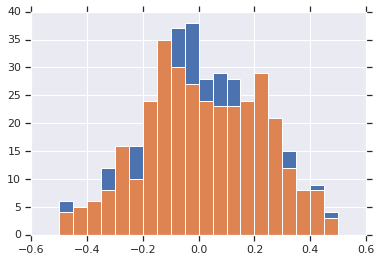

0.102954112794
0.0639287674922


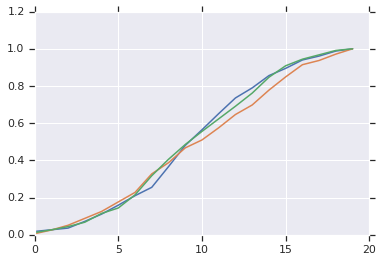

In [14]:
# This is a really nice figure. Shows bimodal nature of the az in the position model, where
# the std comes about because its actually not getting the peak. 

pdf0, pdf1 = calc_kl_divergence(pv0, pv1, 20, (-.5,.5))
pdf0, pdf2 = calc_kl_divergence(pv0, pv2, 20, (-.5,.5))
print entropy(pdf0, pdf1)
print entropy(pdf0, pdf2)
pl.plot(np.cumsum(pdf0))
pl.plot(np.cumsum(pdf1))
pl.plot(np.cumsum(pdf2))
pl.show()

In [65]:
print np.percentile(pv1, [25, 50, 75])
print np.percentile(pv2, [25, 50, 75])
print np.mean(pv1)
print np.std(pv1)
print np.mean(pv2)
print np.std(pv2)

[ 0.23820174  0.3854519   0.49835092]
[ 0.20119277  0.30590515  0.40934706]
0.378744640033
0.183950236467
0.309143578735
0.156481593412


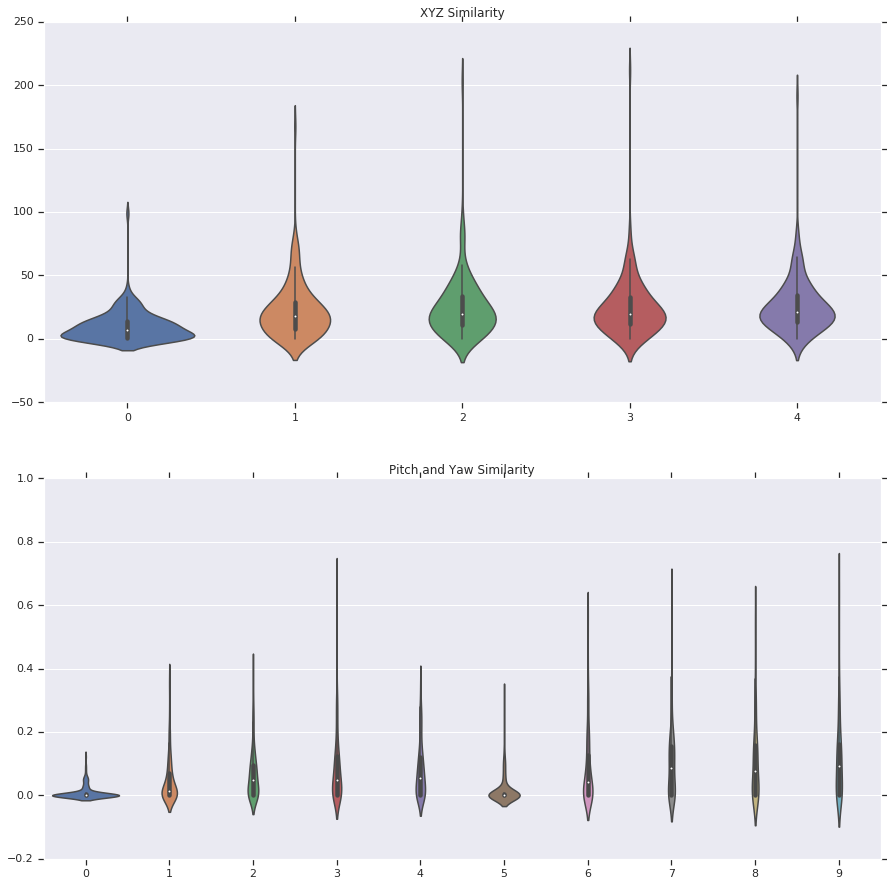

XYZ Quartiles
[[0.48006071311163656, 7.223623453120959, 14.173895630165749], [8.080704198375708, 17.970290233283812, 29.24996420658534], [10.730707948391785, 19.940526818785244, 33.52775471340429], [11.633362884186598, 19.416553217471844, 32.8046417204687], [12.980257442448927, 21.287031941273778, 34.2105199703793]]
Pitch Quartiles
[[0.0, 0.0, 0.0029418371126001346], [0.0, 0.014736330699948511, 0.06990146385186788], [0.0, 0.04901701152277091, 0.09732213375984554], [0.0, 0.04993494981906388, 0.12403902817487923], [0.0, 0.055870029723107825, 0.12051779871533405]]
Yaw Quartiles
[[0.0, 0.0, 0.003872390663151071], [0.0, 0.04140062508864807, 0.1259693382731812], [0.0, 0.08606297076185307, 0.1549309810571844], [0.0, 0.07758693389730853, 0.15825174705870254], [0.0, 0.09343327835592977, 0.16111546191335985]]


In [3]:
#def score_model_similarity(mod1_index, mod2_index,
#                           simlist_by_huntid, num_partitions):

# RETURNS : [fig, xyz_sim, pitch_scores, yaw_scores,
#           [prebout_para1, postbout_para1], [prebout_para2, postbout_para2]]

sms02 = score_model_similarity(0, 2, simlist_by_hunt, 5)

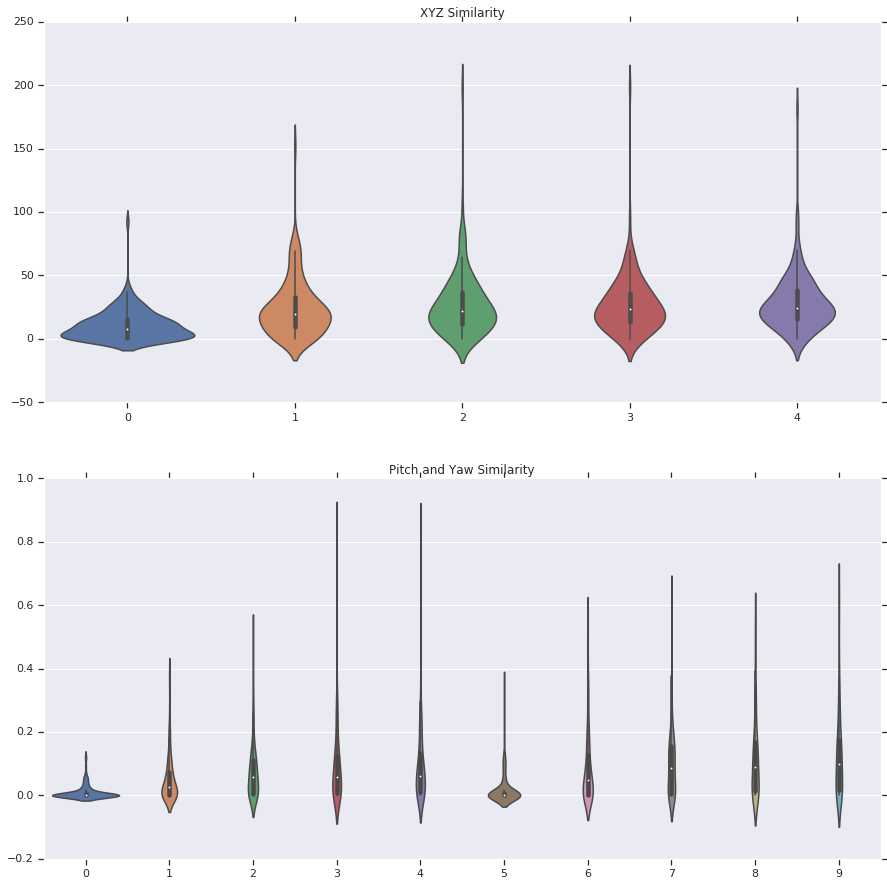

XYZ Quartiles
[[0.9599087327611344, 8.155654945608529, 15.686029906015456], [9.504746208277826, 19.326088514948736, 33.377691891019396], [11.772349426107464, 21.819180183779302, 37.27987551740944], [13.498601109659365, 23.175644639349755, 36.354541688514], [15.535127606828485, 24.069942750878894, 38.31469157142717]]
Pitch Quartiles
[[0.0, 0.0, 0.007008498712561422], [0.0, 0.025026952547317127, 0.07331983038133992], [0.003403014981452689, 0.05698234155146146, 0.11030328762168479], [0.0072335326403727, 0.05798465716399269, 0.1258041364624844], [0.01049144263235507, 0.061967847431424826, 0.13267298505653596]]
Yaw Quartiles
[[0.0, 0.0, 0.006624509416373641], [0.0, 0.04869611716345783, 0.12618120315582737], [0.005762843601910946, 0.08700033932432844, 0.15535452190013202], [0.015196645666241095, 0.08871381102412784, 0.16710937165512907], [0.015490932437205812, 0.09756791925980171, 0.1740499711750863]]


In [103]:
#sb.set_style('white')
#score_trajectory_similarity(True, simlist_by_hunt[100][0], simlist_by_hunt[100][2])
#sms02 = score_model_similarity(0, 2, simlist_by_hunt, 3)
sms01 = score_model_similarity(0, 1, simlist_by_hunt, 5)
#sms12 = score_model_similarity(1, 2, simlist_by_hunt, 3)

In [4]:
#validate_model_transformations(sms01[5][0], sms01[5][1])
multiple_regression_model_velocity[1].summary()
#multiple_regression_model_position[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Bout Alt   No. Observations:                 1402
Model:                            GLM   Df Residuals:                     1395
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                  0.160812592444
Method:                          IRLS   Log-Likelihood:                -704.75
Date:                Thu, 04 Apr 2019   Deviance:                       224.33
Time:                        20:25:43   Pearson chi2:                     224.
No. Iterations:                     4                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 -0.2047      0.026     -7.789      0.000        -0.256    -0.153
Para Az                0.0572      0.024      2.369      0.018         0.010     0.105
Para Alt               1.1608      0.042     27.780      0.000         1.079     1.243
Para Dist             -0.0001   8.93e-05     -1.188      0.235        -0.000  6.89e-05
Para Az Velocity      -0.0204      0.015     -1.388      0.165        -0.049     0.008
Para Alt Velocity      0.2723      0.018     15.279      0.000         0.237     0.307
Para Dist Velocity -5.483e-05      0.000     -0.328      0.743        -0.000     0.000
======================================================================================
"""

Mean Para Az
0.0404542973973
0.26824146846
Mean Para Alt
0.330494522252
0.183262959584
Mean Para Alt
-0.0620984168727
0.0551567121951
Mean Para Dist
215.865010461
107.974830229


([0.56999999999999995,
  0.69999999999999996,
  0.84999999999999998,
  0.84999999999999998],
 [0.014999999999999999, 0.086999999999999994, 0.059999999999999998, -11.878])

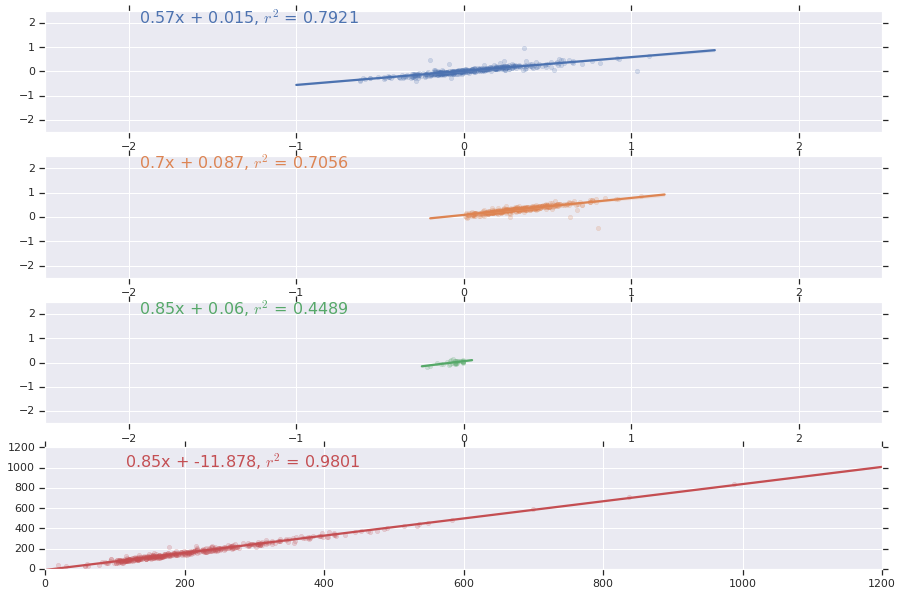

In [6]:
validate_model_transformations(sms02[5][0], sms02[5][1])

In [4]:
marralgs.static_params

{'alt_b_neg': 0.128,
 'alt_b_pos': 0.22900000000000001,
 'alt_m_neg': 0.82999999999999996,
 'alt_m_pos': 0.32000000000000001,
 'az_b': 0.014999999999999999,
 'az_m': 0.40999999999999998,
 'dist_b': -12.736000000000001,
 'dist_m': 0.89000000000000001}

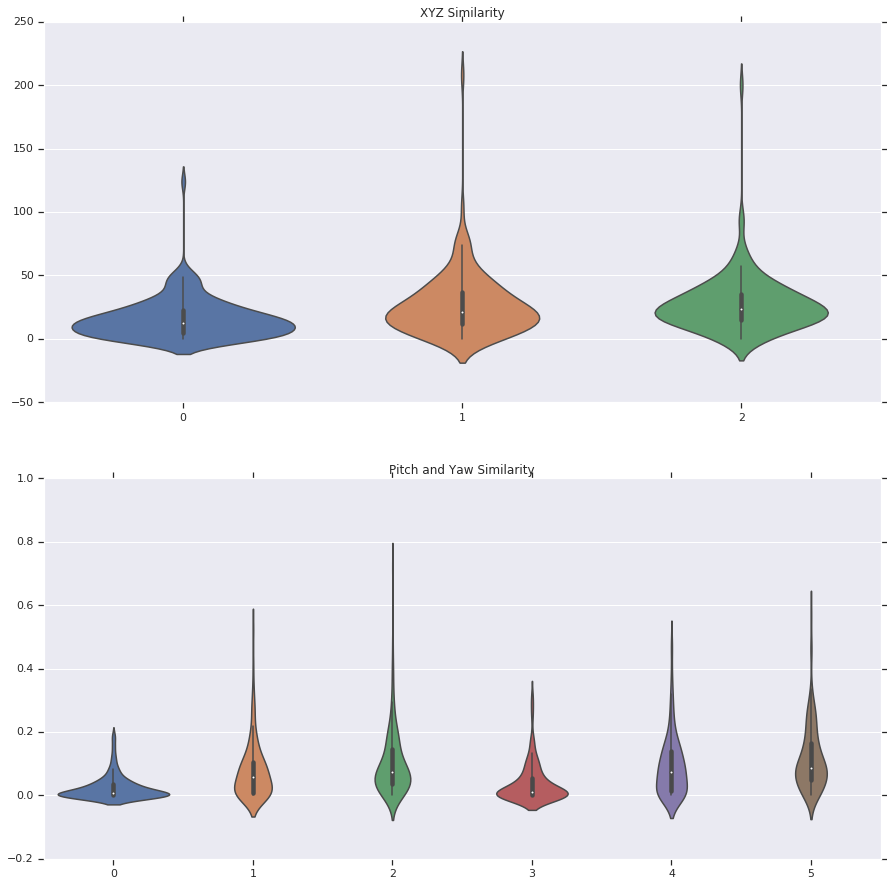

XYZ Quartiles
[[4.497439599730038, 12.71008544129727, 22.46948990851141], [11.630564237310848, 21.504656636209138, 36.971842291533946], [14.62923058792722, 23.770482196685066, 35.747395236398305]]
Pitch Quartiles
[[0.0, 0.006633333333333333, 0.03594101633393829], [0.006757142857142857, 0.05884047619047619, 0.10624350000000002], [0.03743125, 0.07238264705882352, 0.14644107142857143]]
Yaw Quartiles
[[0.0, 0.011484126984126984, 0.05374657142857142], [0.014243750000000001, 0.07362916666666666, 0.14094732142857141], [0.04778854166666667, 0.08695208333333333, 0.1637763636363636]]


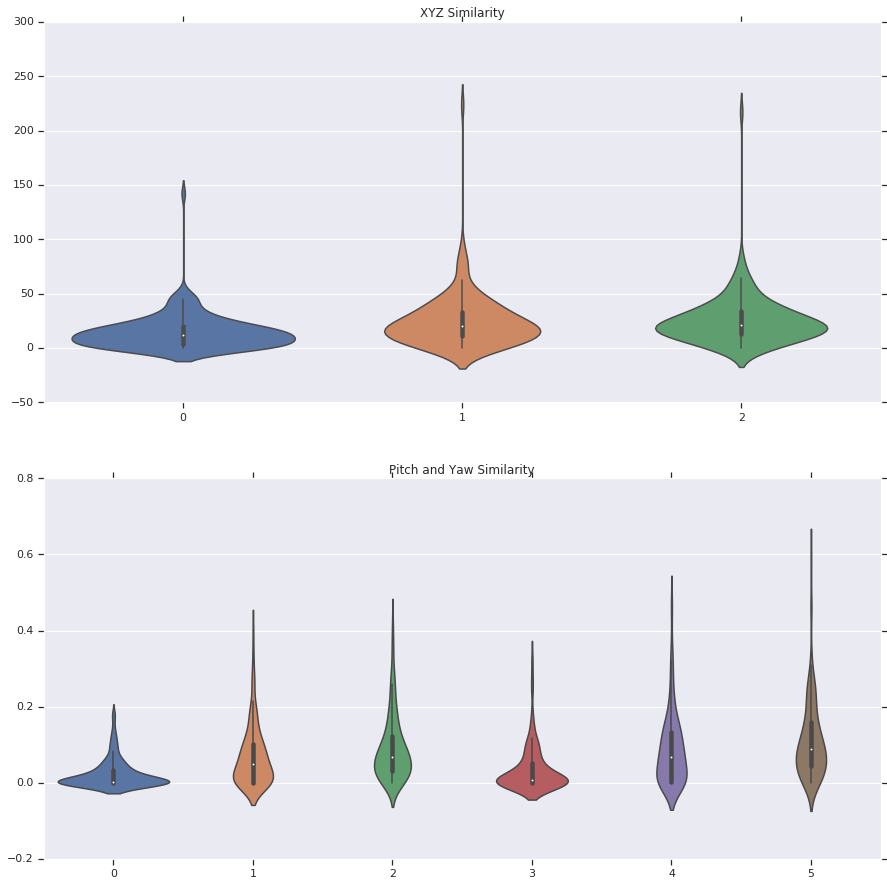

XYZ Quartiles
[[3.2190931132896132, 11.65494718840384, 19.893886658181984], [10.637498658345937, 19.758713369630424, 33.14159668659299], [12.865945224642296, 20.864377662300853, 33.96949736963982]]
Pitch Quartiles
[[0.0, 0.0019000000000000002, 0.03318809523809524], [0.00039166666666666674, 0.04922, 0.10056357142857142], [0.030157857142857146, 0.06823749999999999, 0.12230416666666667]]
Yaw Quartiles
[[0.0, 0.005833333333333334, 0.051633374999999995], [0.0016083333333333331, 0.06787916666666667, 0.13333176470588232], [0.0437, 0.08751118421052631, 0.1583668181818182]]


In [9]:
scores01 = score_model_similarity(0, 1, simlist_by_hunt, 3)
scores02 = score_model_similarity(0, 2, simlist_by_hunt, 3)
#scores04 = score_model_similarity(0, 4, simlist_by_hunt)
#scores23 = score_model_similarity(2, 3, simlist_by_hunt)



In [27]:
wilcoxon(scores01[3][0], scores02[3][0])
# KEY RESULT. Significantly different towards velocity being smaller 

NameError: name 'scores01' is not defined

In [ ]:
labels['Para Az', 'Postbout Para Az']
# STILL HAVE TO INDEX OUT AZ, ALT, DIST. ALMOST THERE
make_regression_plots(scores01[4][:,0], scores01[4][:,1], scores01[5][:, 0], scores01[5][:, 1], )

[(225,), (225,), (225,)]
[(), (), ()]
[(225,), (225,), (225,)]
[(225,), (225,), (225,)]
[(225,), (225,), (225,)]


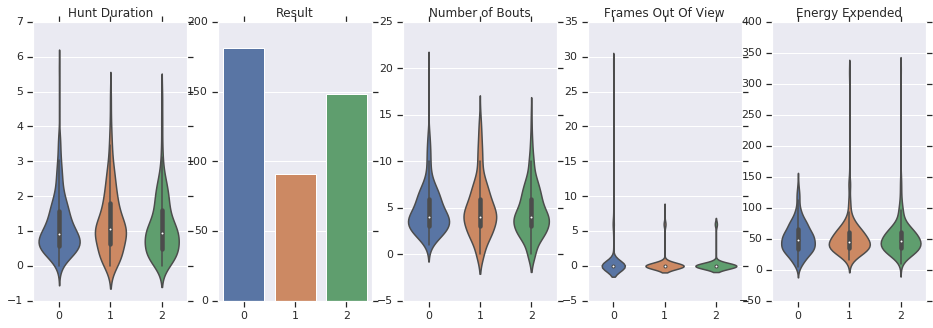

In [3]:
fig = plot_query(ms, p_inits, strike_params, 'violin')
fig.savefig('model_results.pdf')

## note that the ideal model is already maximally good. 
# there is some fault that you're introducing with projecting the para forward, 
# and i think it has to do with the exact number you're using for the projection. 
# if you extrapolate 10 frames but the bout is shorter than that, you will be inevitably ahead
# if you extrapolate 10 frames but the bout is longer, you will be inevitably behind
# you may have to tune the ideal choice to the fish's knowledge of how long its bout will be, 
# then extrapolate according to that (i.e. if the fish's bout will take 20 frames, extrapolate to 20)
